In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
import os
DATA_DIR = './titanic'
data_files = reversed([os.path.join(DATA_DIR, filename) for filename in os.listdir(DATA_DIR)])
df_list = []
for filename in data_files:
    df_list.append(pd.read_csv(filename))
df = pd.concat(df_list, sort=False)
df = df.reset_index(drop=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
number_of_train_dataset = df['Survived'].notnull().sum()  # train data의 개수
number_of_test_dataset = df['Survived'].isnull().sum()  # test data의 개수
y_true = df.pop('Survived')[:number_of_train_dataset]  # train data까지 슬라이싱

In [4]:
df.loc[61, 'Embarked'] = 'S'
df.loc[829, 'Embarked'] = 'S'

In [5]:
def merge_and_get(ldf, rdf, on, how='inner', index=None):
    if index is True:
        return pd.merge(ldf, rdf, how=how, left_index=True, right_index=True)
    else:
        return pd.merge(ldf, rdf, how=how, on=on)

In [6]:
sex_dummies = pd.get_dummies(df[['Sex']])
pclass_dummies = pd.get_dummies(df['Pclass'], prefix='Pclass')
embarked_dummies = pd.get_dummies(df[['Embarked']])

In [7]:
one_hot_df = merge_and_get(df, sex_dummies, on=None, index=True)
one_hot_df = merge_and_get(one_hot_df, pclass_dummies, on=None, index=True)
one_hot_df = merge_and_get(one_hot_df, embarked_dummies, on=None, index=True)

In [8]:
temp_columns = ['Sex', 'Pclass', 'Embarked']
# Sex와 Pclass 간의 관계를 찾기 위함.
one_hot_df['Sex-Pclass'] = df['Sex'].map(str)+df['Pclass'].map(str)
one_hot_df['Embarked-Pclass'] = df['Embarked'].map(str)+df['Pclass'].map(str)

one_hot_df = merge_and_get(one_hot_df, pd.get_dummies(one_hot_df['Sex-Pclass'], prefix="SexPclass"), on=None, index=True)
one_hot_df = merge_and_get(one_hot_df, pd.get_dummies(one_hot_df['Embarked-Pclass'], prefix="EmbarkedPclass"), on=None, index=True)
one_hot_df


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,SexPclass_male3,EmbarkedPclass_C1,EmbarkedPclass_C2,EmbarkedPclass_C3,EmbarkedPclass_Q1,EmbarkedPclass_Q2,EmbarkedPclass_Q3,EmbarkedPclass_S1,EmbarkedPclass_S2,EmbarkedPclass_S3
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,1,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,0,1,0,0,0,0,0,0,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,0,0,0,0,0,0,0,1,0,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,...,1,0,0,0,0,0,0,0,0,1
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,...,0,1,0,0,0,0,0,0,0,0
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,...,1,0,0,0,0,0,0,0,0,1
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,...,1,0,0,0,0,0,0,0,0,1


## Numeric data types

In [9]:
numeric_columns = ['Age', 'SibSp', 'Parch', 'Fare']

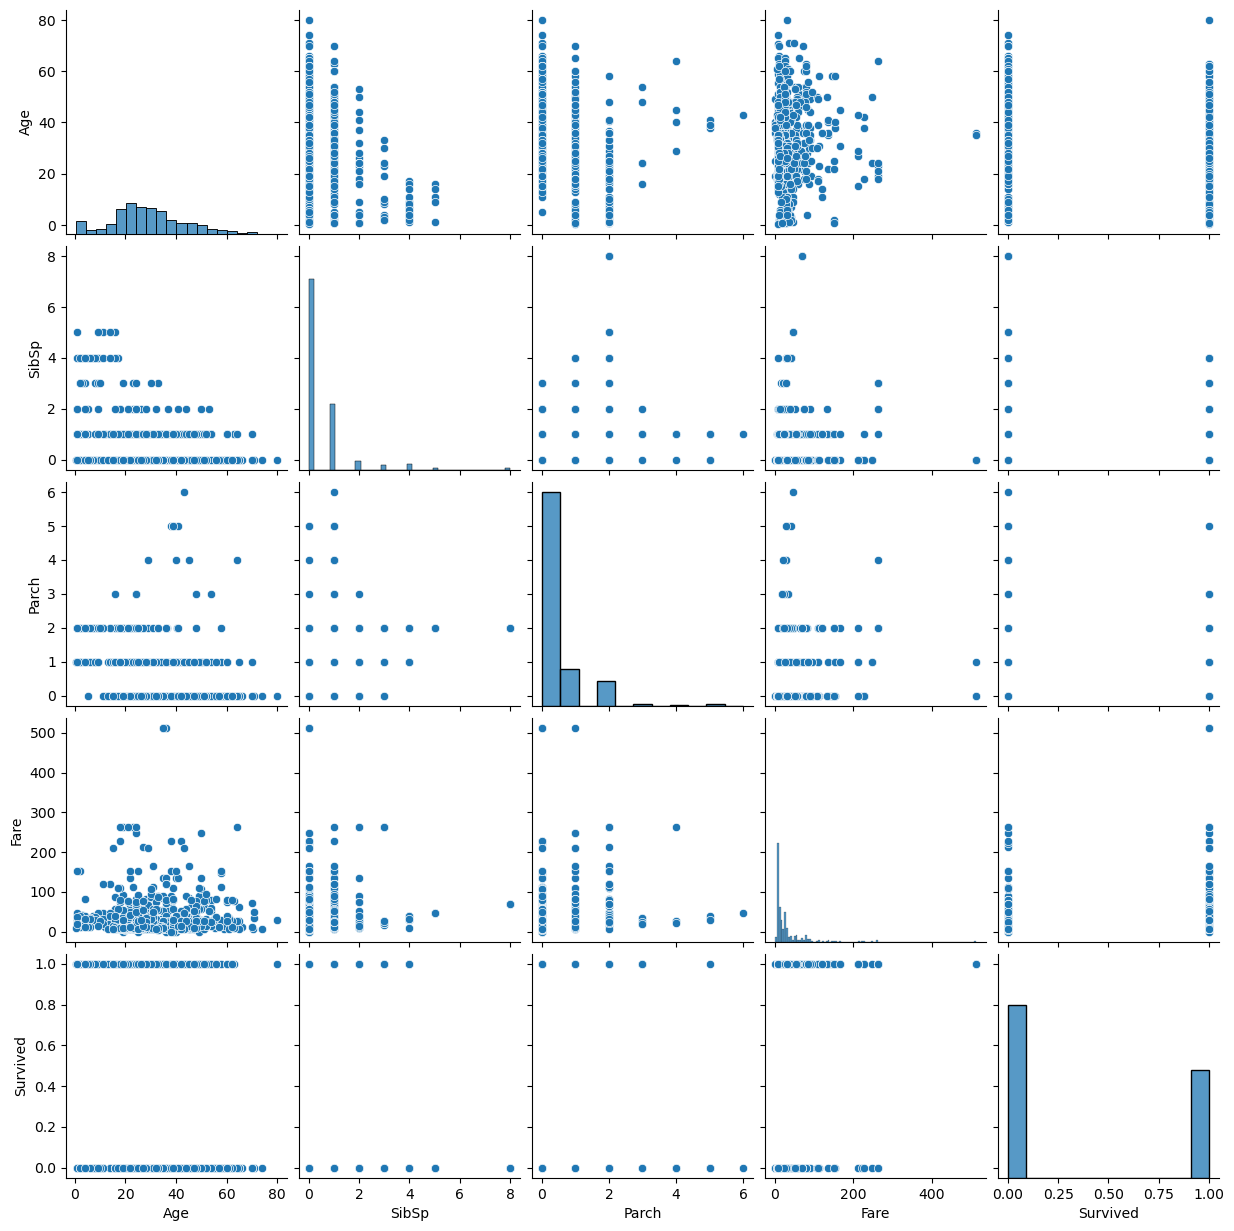

In [10]:
temp_df = pd.merge(one_hot_df[numeric_columns], y_true, left_index=True, right_index= True)

sns.pairplot(temp_df)

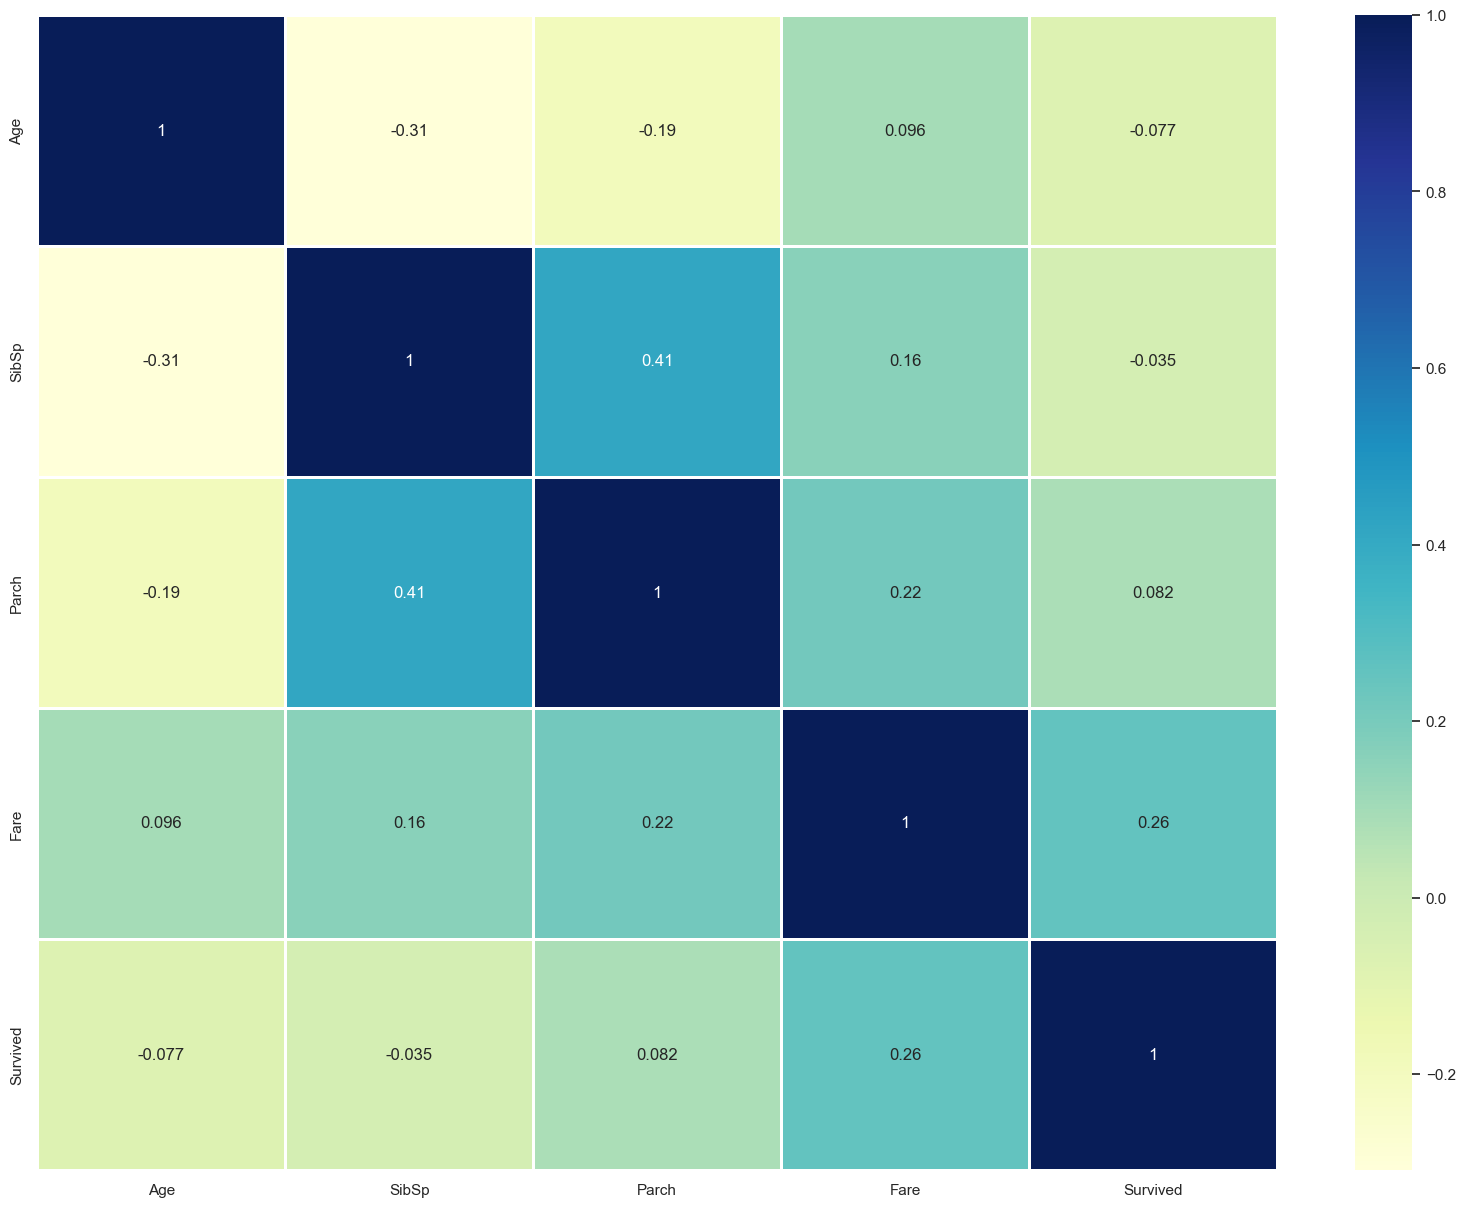

In [11]:
corr = temp_df.corr()
sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True, linewidths=0.8, cmap='YlGnBu')

/var/folders/w3/8l1p0j1d51s69f3vlw1939ym0000gn/T/ipykernel_62357/2542972435.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='SibSp', y='Fare', hue='Survived', data=temp_df, ci=68, capsize=0.2)


<AxesSubplot: xlabel='SibSp', ylabel='Fare'>

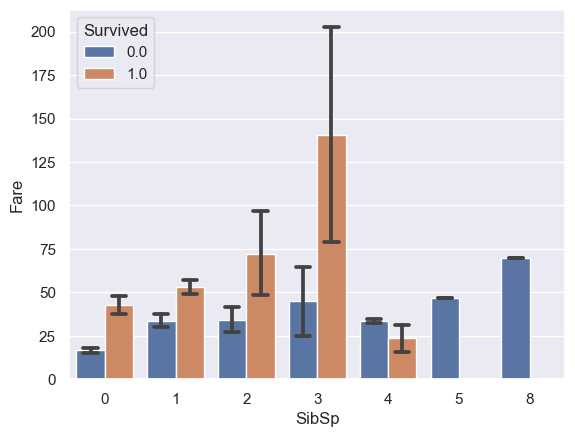

In [12]:
sns.barplot(x='SibSp', y='Fare', hue='Survived', data=temp_df, ci=68, capsize=0.2)

- 3명 정도의 형제/자매를 가진 사람들은 높은 요금을 내고 탑승했고, 생존율도 높았다

/var/folders/w3/8l1p0j1d51s69f3vlw1939ym0000gn/T/ipykernel_62357/2453041768.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='Parch', y='Fare', hue='Survived', data=temp_df, ci=68, capsize=0.2)


<AxesSubplot: xlabel='Parch', ylabel='Fare'>

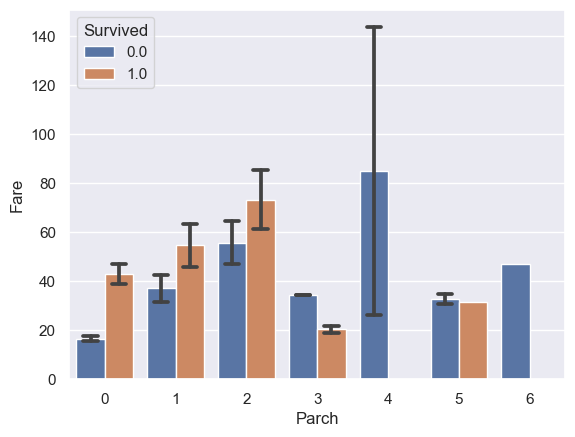

In [13]:
sns.barplot(x='Parch', y='Fare', hue='Survived', data=temp_df, ci=68, capsize=0.2)

/var/folders/w3/8l1p0j1d51s69f3vlw1939ym0000gn/T/ipykernel_62357/2117127018.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='SibSp', y='Age', hue='Survived', data=temp_df, ci=68, capsize=0.2)
/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


<AxesSubplot: xlabel='SibSp', ylabel='Age'>

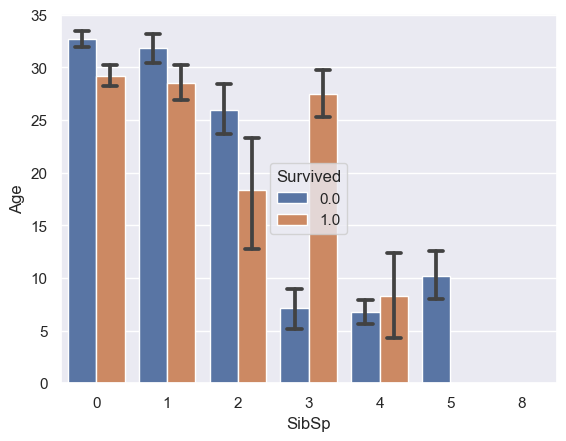

In [14]:
sns.barplot(x='SibSp', y='Age', hue='Survived', data=temp_df, ci=68, capsize=0.2)

/var/folders/w3/8l1p0j1d51s69f3vlw1939ym0000gn/T/ipykernel_62357/2117127018.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='SibSp', y='Age', hue='Survived', data=temp_df, ci=68, capsize=0.2)
/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


<AxesSubplot: xlabel='SibSp', ylabel='Age'>

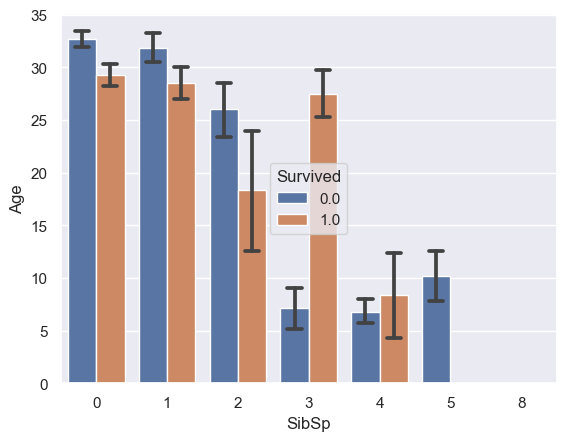

In [15]:
sns.barplot(x='SibSp', y='Age', hue='Survived', data=temp_df, ci=68, capsize=0.2)

## Bining

In [19]:
one_hot_df["Fare"].value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
7.7417      1
8.1583      1
8.4583      1
7.8000      1
7.7208      1
Name: Fare, Length: 281, dtype: int64

<AxesSubplot: >

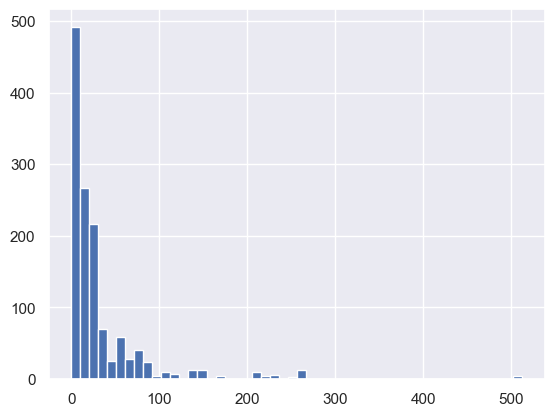

In [21]:
one_hot_df["Fare"].hist(bins=50)

## Log Transform

/var/folders/w3/8l1p0j1d51s69f3vlw1939ym0000gn/T/ipykernel_62357/4152858776.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax[i] = sns.distplot(X_1, bins=10)
/var/folders/w3/8l1p0j1d51s69f3vlw1939ym0000gn/T/ipykernel_62357/4152858776.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax[i] = sns.distplot(X_1, bin

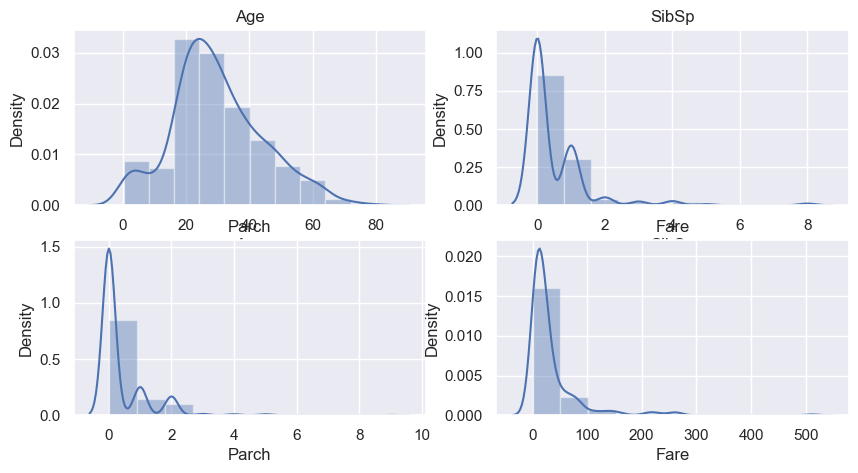

In [16]:
fig = plt.figure()
fig.set_size_inches(10, 5) # 사이즈 설정

ax = []
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i,col_name in enumerate(numeric_columns):
    ax.append(fig.add_subplot(2, 2, i+1)) # 두 개의 plot 생성
    X_1 = one_hot_df[col_name]

    ax[i] = sns.distplot(X_1, bins=10)
    ax[i].set_title(col_name)

/var/folders/w3/8l1p0j1d51s69f3vlw1939ym0000gn/T/ipykernel_62357/2870660028.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax[i] = sns.distplot(X_1, bins=10)
/var/folders/w3/8l1p0j1d51s69f3vlw1939ym0000gn/T/ipykernel_62357/2870660028.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax[i] = sns.distplot(X_1, bin

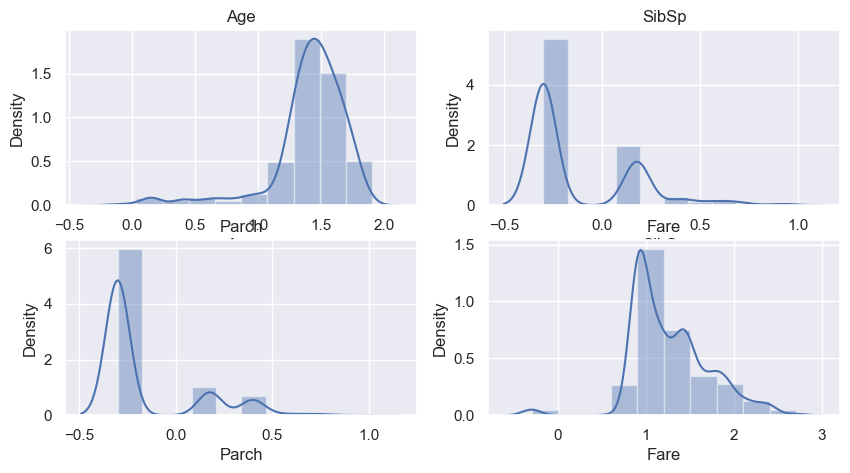

In [18]:
fig = plt.figure()
fig.set_size_inches(10, 5) # 사이즈 설정

ax = []
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i,col_name in enumerate(numeric_columns):
    ax.append(fig.add_subplot(2, 2, i+1)) # 두 개의 plot 생성
    X_1 = np.log10(one_hot_df[col_name]+0.5)

    ax[i] = sns.distplot(X_1, bins=10)
    ax[i].set_title(col_name)

- Fare의 경우 정규분포의 형태를 띤다

In [25]:
one_hot_df['Fare'] = one_hot_df['Fare'].fillna(one_hot_df['Fare'].mean())

In [26]:
one_hot_df.isnull().sum()

PassengerId             0
Pclass                  0
Name                    0
Sex                     0
Age                   263
SibSp                   0
Parch                   0
Ticket                  0
Fare                    0
Cabin                1014
Embarked                0
Sex_female              0
Sex_male                0
Pclass_1                0
Pclass_2                0
Pclass_3                0
Embarked_C              0
Embarked_Q              0
Embarked_S              0
Sex-Pclass              0
Embarked-Pclass         0
SexPclass_female1       0
SexPclass_female2       0
SexPclass_female3       0
SexPclass_male1         0
SexPclass_male2         0
SexPclass_male3         0
EmbarkedPclass_C1       0
EmbarkedPclass_C2       0
EmbarkedPclass_C3       0
EmbarkedPclass_Q1       0
EmbarkedPclass_Q2       0
EmbarkedPclass_Q3       0
EmbarkedPclass_S1       0
EmbarkedPclass_S2       0
EmbarkedPclass_S3       0
dtype: int64

In [35]:
log_one_hot_df = merge_and_get(one_hot_df, np.log10(one_hot_df['Fare'] + 0.5), on=None, index=True)
log_one_hot_df.rename(columns={'Fare_x' : 'Fare', 'Fare_y': 'log_fare'}, inplace=True)
log_one_hot_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,EmbarkedPclass_C1,EmbarkedPclass_C2,EmbarkedPclass_C3,EmbarkedPclass_Q1,EmbarkedPclass_Q2,EmbarkedPclass_Q3,EmbarkedPclass_S1,EmbarkedPclass_S2,EmbarkedPclass_S3,log_fare
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,0,0,0,0,0,0,1,0.889302
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,1,0,0,0,0,0,0,0,0,1.856023
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,0,0,0,0,0,0,1,0.925570
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,0,0,0,0,0,0,1,0,0,1.729165
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,0,0,0,0,0,0,0,0,1,0.931966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,...,0,0,0,0,0,0,0,0,1,0.931966
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,...,1,0,0,0,0,0,0,0,0,2.039017
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,...,0,0,0,0,0,0,0,0,1,0.889302
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,...,0,0,0,0,0,0,0,0,1,0.931966


#### Violin Plot

- 데이터의 분포를 보면서 여러가지 관점에서 확인할 수 있음

In [36]:
object_columns = ['PassengerId', 'Pclass', 'Name', 'Sex', "Ticket", 'Cabin', 'Embarked']

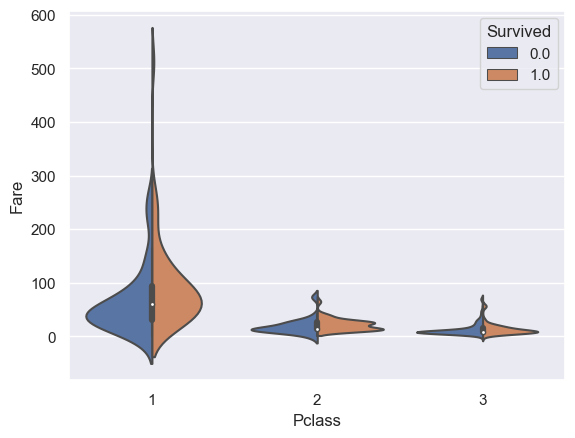

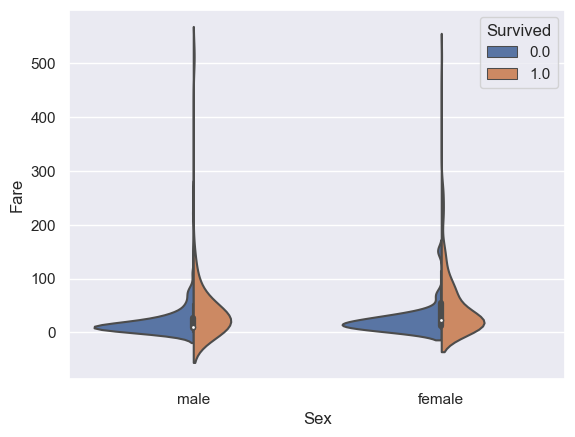

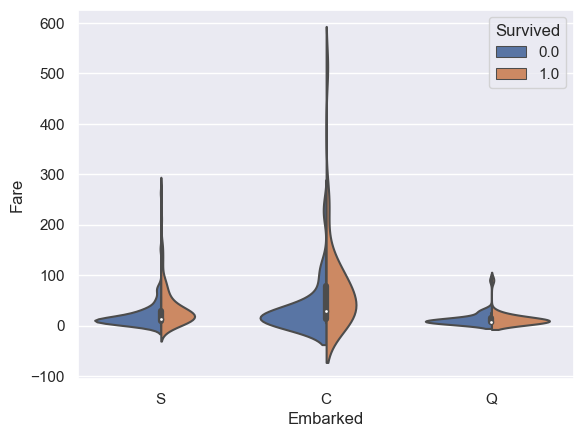

In [38]:
temp_df = pd.merge(log_one_hot_df[numeric_columns + object_columns], y_true, left_index=True, right_index=True)

for col_name in ['Pclass', 'Sex', 'Embarked']:
    sns.violinplot(x=col_name, y='Fare', hue='Survived', data=temp_df, split=True)
    plt.show()

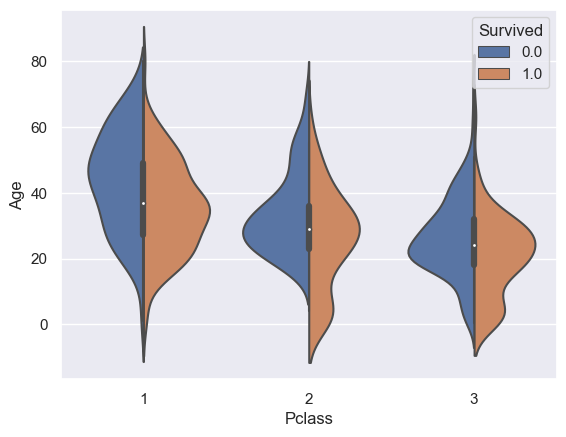

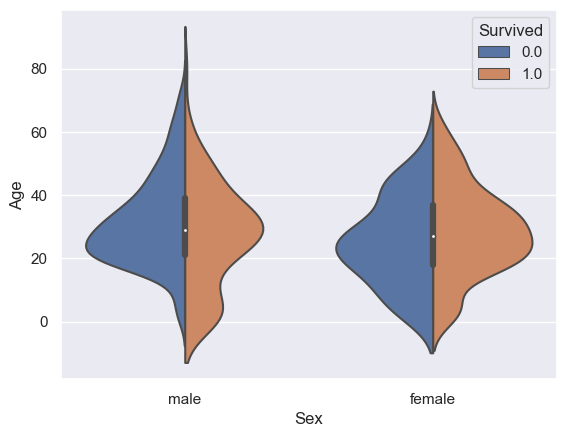

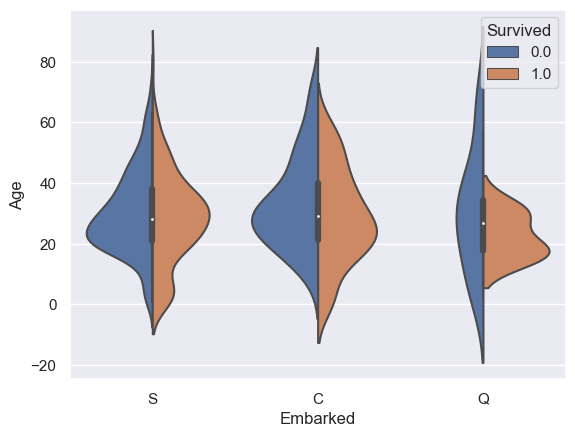

In [39]:
temp_df = pd.merge(log_one_hot_df[numeric_columns + object_columns], y_true, left_index=True, right_index=True)

for col_name in ['Pclass', 'Sex', 'Embarked']:
    sns.violinplot(x=col_name, y='Age', hue='Survived', data=temp_df, split=True)
    plt.show()

- 나이는 어느 것이든 정규분포를 따른다는 것을 알 수 있음
- 성별도 어느정도 정규분포를 따름

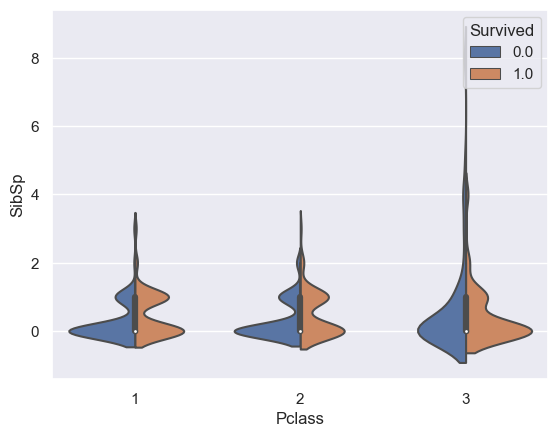

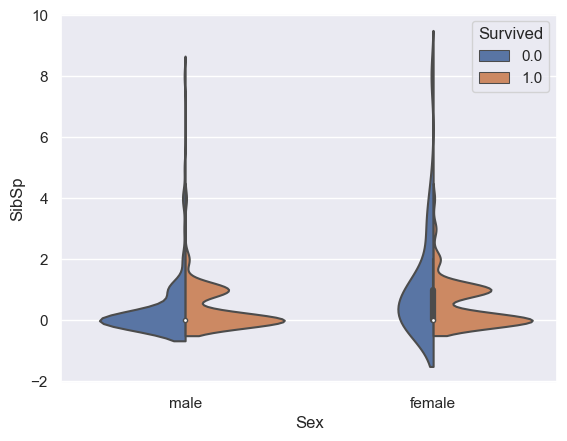

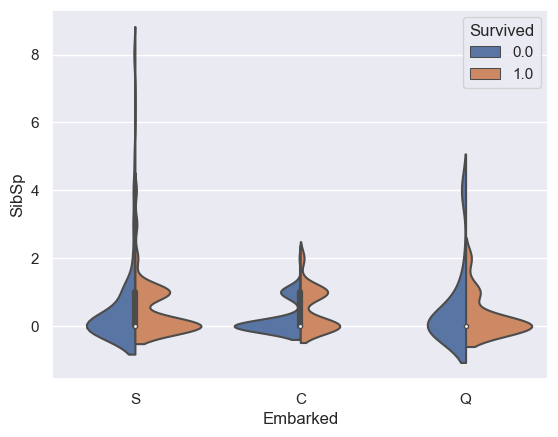

In [40]:
temp_df = pd.merge(log_one_hot_df[numeric_columns + object_columns], y_true, left_index=True, right_index=True)

for col_name in ['Pclass', 'Sex', 'Embarked']:
    sns.violinplot(x=col_name, y='SibSp', hue='Survived', data=temp_df, split=True)
    plt.show()

/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


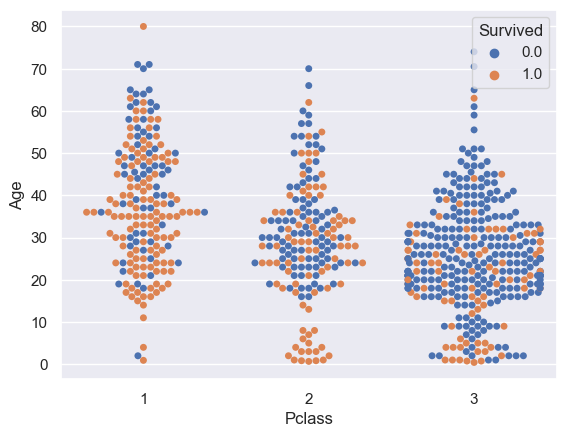

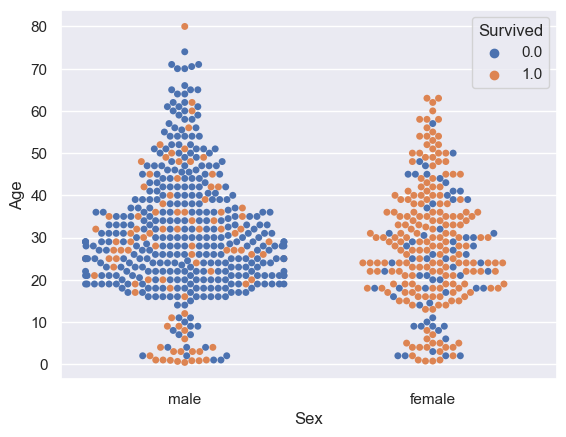

/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 14.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 26.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 26.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


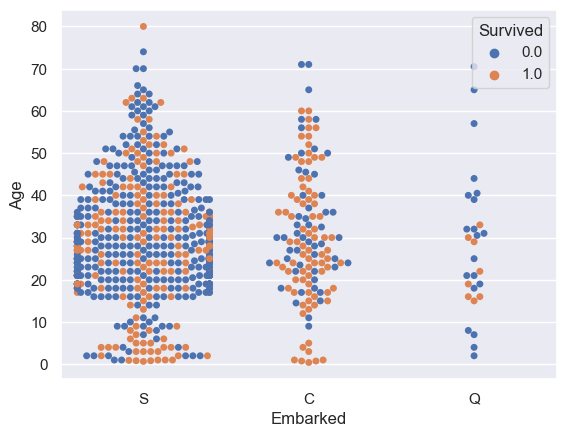

In [42]:
temp_df = pd.merge(log_one_hot_df[numeric_columns + object_columns], y_true, left_index=True, right_index=True)

for col_name in ['Pclass', 'Sex', 'Embarked']:
    sns.swarmplot(x=col_name, y='Age', hue='Survived', data=temp_df)
    plt.show()

## String handling

#### 가장 많이 나온 단어 3개 추출

In [49]:
from collections import Counter
Counter((log_one_hot_df['Name'].str.lower() + " ").sum().split()).most_common(3)

[('mr.', 757), ('miss.', 260), ('mrs.', 197)]

In [50]:
log_one_hot_df['is_mr'] =log_one_hot_df['Name'].str.lower().str.contains(pat='mr.')
log_one_hot_df['is_miss'] =log_one_hot_df['Name'].str.lower().str.contains(pat='miss.')
log_one_hot_df['is_mrs'] =log_one_hot_df['Name'].str.lower().str.contains(pat='mrs.')

In [66]:
# 티켓 문자열 분리
log_one_hot_df['Ticket'].str.rsplit(expand=True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
1304,A.5.,3236,None
1305,PC,17758,None
1306,SOTON/O.Q.,3101262,None
1307,359309,None,None


In [65]:
# 티켓에서 숫자 정보만 추출하기
log_one_hot_df['Ticket'].str.extractall('(\d+)')

0
     match         
0    0            5
     1        21171
1    0        17599
2    0            2
     1      3101282
...             ...
1304 1         3236
1305 0        17758
1306 0      3101262
1307 0       359309
1308 0         2668

[1373 rows x 1 columns]

In [67]:
Counter((log_one_hot_df['Ticket'].str.lower() + " ").sum().split()).most_common(30)

[('pc', 92),
 ('c.a.', 46),
 ('sc/paris', 16),
 ('soton/o.q.', 16),
 ('2.', 15),
 ('w./c.', 14),
 ('ston/o', 14),
 ('a/5', 12),
 ('ca.', 12),
 ('2343', 11),
 ('a/5.', 10),
 ('ca', 10),
 ('f.c.c.', 9),
 ('2144', 8),
 ('1601', 8),
 ('soton/oq', 8),
 ('c', 8),
 ('ston/o2.', 7),
 ('347082', 7),
 ('347077', 7),
 ('3101295', 7),
 ('s.o.c.', 7),
 ('14879', 7),
 ('17608', 7),
 ('s.o./p.p.', 7),
 ('382652', 6),
 ('19950', 6),
 ('347088', 6),
 ('113781', 6),
 ('a/4', 6)]

In [68]:
log_one_hot_df['is_pc'] = log_one_hot_df['Ticket'].str.lower().str.contains(pat= 'pc')
log_one_hot_df['is_ca'] = log_one_hot_df['Ticket'].str.lower().str.contains(pat= 'c.a.')
log_one_hot_df['is_paris'] = log_one_hot_df['Ticket'].str.lower().str.contains(pat= 'paris')
log_one_hot_df['is_soton'] = log_one_hot_df['Ticket'].str.lower().str.contains(pat= 'soton')
log_one_hot_df['is_ston'] = log_one_hot_df['Ticket'].str.lower().str.contains(pat= 'ston')
log_one_hot_df['is_so'] = log_one_hot_df['Ticket'].str.lower().str.contains(pat= 's.o')

In [69]:
log_one_hot_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,log_fare,is_mr,is_miss,is_mrs,is_pc,is_ca,is_paris,is_soton,is_ston,is_so
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,0.889302,True,False,False,False,False,False,False,False,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,1.856023,True,False,True,True,False,False,False,False,False
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0.925570,False,True,False,False,False,False,False,True,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,1.729165,True,False,True,False,False,False,False,False,False
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,0.931966,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,...,0.931966,True,False,False,False,False,False,False,False,False
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,...,2.039017,False,False,False,True,False,False,False,False,False
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,...,0.889302,True,False,False,False,False,False,True,False,False
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,...,0.931966,True,False,False,False,False,False,False,False,False


In [70]:
log_one_hot_df.isnull().sum()

PassengerId             0
Pclass                  0
Name                    0
Sex                     0
Age                   263
SibSp                   0
Parch                   0
Ticket                  0
Fare                    0
Cabin                1014
Embarked                0
Sex_female              0
Sex_male                0
Pclass_1                0
Pclass_2                0
Pclass_3                0
Embarked_C              0
Embarked_Q              0
Embarked_S              0
Sex-Pclass              0
Embarked-Pclass         0
SexPclass_female1       0
SexPclass_female2       0
SexPclass_female3       0
SexPclass_male1         0
SexPclass_male2         0
SexPclass_male3         0
EmbarkedPclass_C1       0
EmbarkedPclass_C2       0
EmbarkedPclass_C3       0
EmbarkedPclass_Q1       0
EmbarkedPclass_Q2       0
EmbarkedPclass_Q3       0
EmbarkedPclass_S1       0
EmbarkedPclass_S2       0
EmbarkedPclass_S3       0
log_fare                0
is_mr                   0
is_miss     

In [77]:
test = log_one_hot_df['Cabin'].fillna('99999')
Counter((test.str.lower() + " ").sum().split()).most_common(30)

[('99999', 1014),
 ('f', 8),
 ('c23', 6),
 ('c25', 6),
 ('c27', 6),
 ('g6', 5),
 ('b57', 5),
 ('b59', 5),
 ('b63', 5),
 ('b66', 5),
 ('f33', 4),
 ('f2', 4),
 ('f4', 4),
 ('c78', 4),
 ('d', 4),
 ('c22', 4),
 ('c26', 4),
 ('b96', 4),
 ('b98', 4),
 ('e46', 3),
 ('b58', 3),
 ('b60', 3),
 ('e101', 3),
 ('e34', 3),
 ('a34', 3),
 ('c101', 3),
 ('b51', 3),
 ('b53', 3),
 ('b55', 3),
 ('c85', 2)]

In [78]:
log_one_hot_df["is_cabin_a"] = test.str.contains(pat= 'a')
log_one_hot_df["is_cabin_b"] = test.str.contains(pat= 'b')
log_one_hot_df["is_cabin_c"] = test.str.contains(pat= 'c')
log_one_hot_df["is_cabin_d"] = test.str.contains(pat= 'd')
log_one_hot_df["is_cabin_e"] = test.str.contains(pat= 'e')
log_one_hot_df["is_cabin_f"] = test.str.contains(pat= 'f')
log_one_hot_df["is_cabin_g"] = test.str.contains(pat= 'g')

In [79]:
log_one_hot_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,is_soton,is_ston,is_so,is_cabin_a,is_cabin_b,is_cabin_c,is_cabin_d,is_cabin_e,is_cabin_f,is_cabin_g
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,False,False,False,False,False,False,False,False,False,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,False,False,False,False,False,False,False,False,False,False
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,False,True,True,False,False,False,False,False,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,False,False,False,False,False,False,False,False,False,False
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,...,False,False,False,False,False,False,False,False,False,False
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,...,False,False,False,False,False,False,False,False,False,False
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,...,True,False,False,False,False,False,False,False,False,False
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,...,False,False,False,False,False,False,False,False,False,False


In [86]:
def count_cabin(x):
    if type(x) is int:
        return 0
    else:
        return len(x)

log_one_hot_df['number_of_Cabin'] = log_one_hot_df['Cabin'].str.split(" ").fillna(0).map(count_cabin)
log_one_hot_df['log_number_of_Cabin'] = np.log(log_one_hot_df['number_of_Cabin'] + 0.01)

<AxesSubplot: xlabel='number_of_Cabin', ylabel='count'>

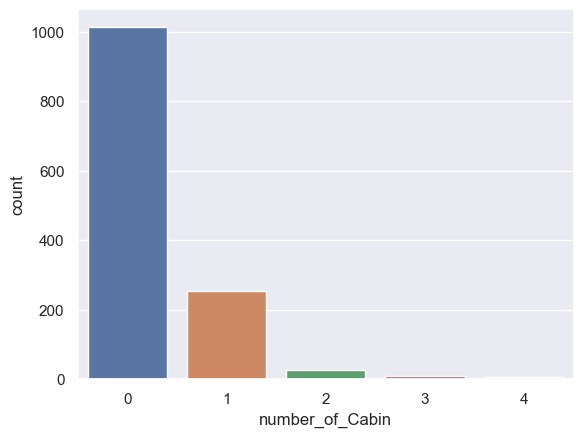

In [101]:
# unique value들도 포함하도록
sns.countplot(x='number_of_Cabin', data=log_one_hot_df, order=log_one_hot_df['number_of_Cabin'].value_counts().index)

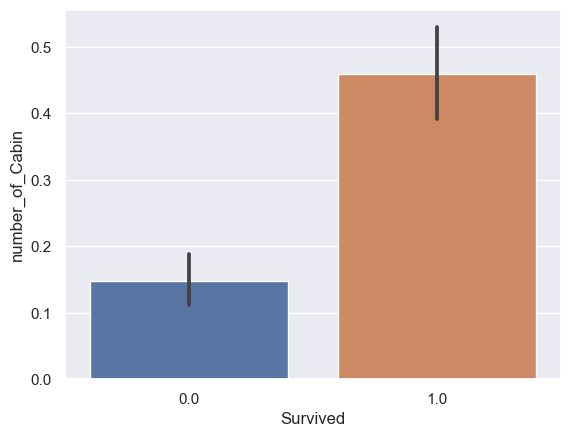

                     number_of_Cabin  log_number_of_Cabin  Survived
number_of_Cabin             1.000000             0.924291  0.277053
log_number_of_Cabin         0.924291             1.000000  0.314632
Survived                    0.277053             0.314632  1.000000


In [104]:
temp_df = pd.merge(log_one_hot_df[['number_of_Cabin', 'log_number_of_Cabin']], y_true, left_index=True, right_index=True)
sns.barplot(x='Survived', y='number_of_Cabin', data=temp_df)
plt.show()
print(temp_df.corr())